<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#The-data:-The-MNIST-data-set" data-toc-modified-id="The-data:-The-MNIST-data-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The data: The MNIST data set</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Creating-training-and-test-sets" data-toc-modified-id="Creating-training-and-test-sets-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creating training and test sets</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Explore the data</a></span></li><li><span><a href="#Multiclass-classification-model" data-toc-modified-id="Multiclass-classification-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Multiclass classification model</a></span><ul class="toc-item"><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Cross-validation</a></span></li><li><span><a href="#Accuracy-on-the-test-set" data-toc-modified-id="Accuracy-on-the-test-set-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Accuracy on the test set</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>Confusion matrix</a></span></li></ul></li></ul></li><li><span><a href="#Error-analysis" data-toc-modified-id="Error-analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Error analysis</a></span><ul class="toc-item"><li><span><a href="#Analyzing-individual-errors" data-toc-modified-id="Analyzing-individual-errors-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Analyzing individual errors</a></span></li></ul></li><li><span><a href="#End" data-toc-modified-id="End-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>End</a></span></li></ul></div>

A.S. Lundervold, v. 270921

This notebook is partly based on `https://github.com/alu042/DAT158ML/blob/master/notebooks/DAT158-Part1-3-classification.ipynb`, which is partly based on the book _Aurélien Géron &ndash; Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition_

# Introduction

This notebook continues the story in `2.0-classification-evaluating_binary_classifiers.ipynb` by looking at the evaluation of **multiclass classifiers** through an example. 

<img src="assets/MnistExamples.png">

# Setup

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

The notebook is not running on Colab. colab=False.


In [2]:
# To display plots directly in the notebook:
%matplotlib inline

We import our standard framework:

In [3]:
# For this notebook, we need an updated version of scikit-learn if using Colab
if colab:
    !pip install scikit-learn --upgrade

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [5]:
# Set the directory in which to store data
NB_DIR = Path.cwd()       # Set NB_DIR to be the current working directory
DATA = NB_DIR/'data'      # The data dir is the subdirectory 'data' under NB_DIR

DATA.mkdir(exist_ok=True) # Create the data directory

# The data: The MNIST data set

We'll base our discussion on a famous benchmark dataset: **MNIST**

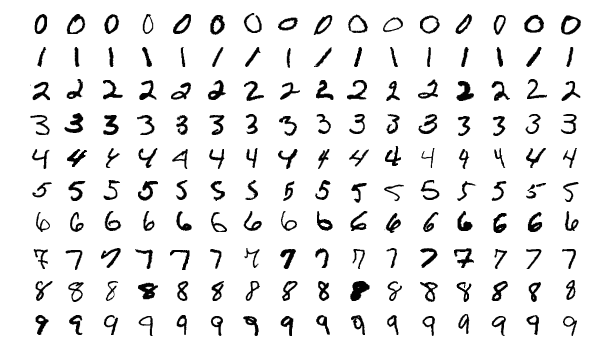

In [6]:
import IPython
IPython.display.Image('assets/MnistExamples.png', width='90%')

MNIST consists of 70.000 examples of handwritten digits. It has been called "the machine learning equivalent of fruit flies": it's simple, but not too simple, and is very well-studied. Have a look at https://en.wikipedia.org/wiki/MNIST_database and http://yann.lecun.com/exdb/mnist/ for more details.

Our goal is to construct a system that can take an image from MNIST as input and produce the correct digit 0, ..., 9 as output. This is a **multi-class system** as there are more than two possible outcomes (in contrast to our previous example of True or False for diabetes).

<centering>
<img src="assets/MNIST-goal.png">
</centering>

Correctly classifying handwritten digits is a difficult problem.. Can you come up with features that characterizes all the number 2's, but none of the other digits? How can you program rules that detect only 2's?

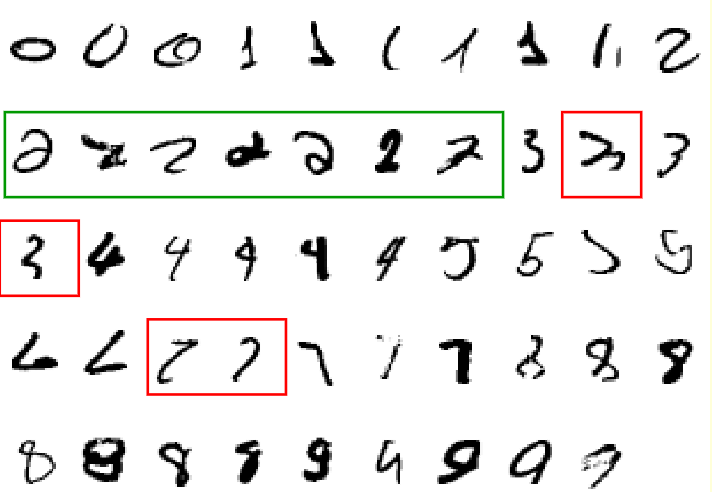

In [7]:
import IPython
IPython.display.Image('assets/mnist-difficult.png', width='90%')

<span style="font-size:smaller">Image from G. Hinton's Coursera course [Neural Networks for Machine Learning](https://www.cs.toronto.edu/~hinton/coursera_lectures.html), now [discontinued](https://twitter.com/geoffreyhinton/status/1085325734044991489) </span>

# Get the data

[OpenML](https://www.openml.org/) is a convenient source of machine learning data, containing MNIST among many other standard data sets. Scikit-learn has a method we can use to fetch data from OpenML:

In [8]:
from sklearn.datasets import fetch_openml

In [9]:
mnist = fetch_openml('mnist_784', version=1, data_home='./data', return_X_y=True)

Each of the 70.000 images are of size 28*28 = 784, 

In [10]:
mnist[0].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 70.000 labels, one for each image (i.e. each row of the data frame):

In [11]:
mnist[1].shape

(70000,)

We store the features in X and the target labels in y, as usual:

In [12]:
X = mnist[0]
y = mnist[1]

# Creating training and test sets

As we've discussed, after collecting the data to be studied, the first step is to set aside a test set. 

> We're not interested in how well our models perform on the training set, what we're really after is how well they generalize to unseen data. 

<img width=50% src="assets/testsplit.png"> 

We'll use the first 60.000 images as our training data and the last 10.000 as test (this is the standard split for MNIST):

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Explore the data

As always, we should take a look at the training data. Having a feeling for the variation and quality of the data, and also a feeling for the difficulty of the task, is crucial for constructing machine learning models. When dealing with images it's of course convenient to plot them.

In [14]:
some_digit = np.array(X_train.iloc[34500])

The images are vectors of length 784:

In [15]:
some_digit.shape

(784,)

In [16]:
28*28

784

To plot them we reshape to 28*28:

In [17]:
some_digit_image = some_digit.reshape(28,28)

Here's a small section of the image:

In [18]:
some_digit_image[15:20,15:20]

array([[ 19., 218., 231.,   9.,   0.],
       [  0.,  48., 254., 168.,   0.],
       [  0.,   7., 210., 232.,   0.],
       [  0.,  13., 222., 232.,   0.],
       [  3., 105., 254., 191.,   0.]])

The numbers represent grayscale values.

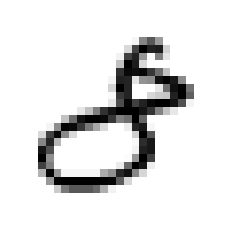

In [19]:
# Plot the image using a grayscale colormap
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()

Let's make a small convenience function to plot MNIST images:

In [20]:
def plot_digit(data):
    data = np.array(data)
    image = data.reshape(28,28)
    plt.imshow(image, cmap=matplotlib.cm.binary)
    plt.axis("off")

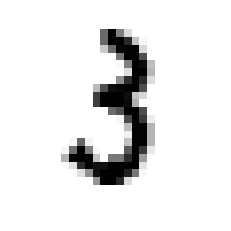

In [21]:
plot_digit(X_train.iloc[1234])

...and plot a random selection:

In [22]:
import random

In [23]:
nb=10
to_plot = random.choices(X_train.values, k=nb)

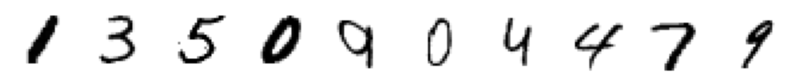

In [24]:
f = plt.figure(figsize=(14,14))
for i in range(nb):
    plt.subplot(1,nb,i+1)
    plot_digit(to_plot[i])
plt.show()

> **Your turn!** Make a function that plots a random selection of images from a specified class. For example `plot_images(image_class='8', nb=25)` should plot 25 random 8's from the training data:

<img src="assets/plot_MNIST_images.png">

You'll want to create such small throwaway helper functions all the time when you're investigating a new data set.

# Multiclass classification model

In the previous notebook we saw some of the major concepts and techniques in binary classification. Let's try to predict something that's more difficult: all the 10 classes in MNIST.

The ideas behind multiclass predictions are the same, but the difficulty for our models are increased. 

Superficially, not much changes. We can use the same scikit-learn models as before, because scikit-learn takes care of adapting models for multi-class predictions. For example the `SGDClassifier` and the `RandomForestClassifier`.

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
sgd_clf = SGDClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

As we've discussed, for the `SGDClassifier` it is important to normalize the data:

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

We can then fit the models and make predictions:

In [30]:
sgd_clf.fit(X_train_std, y_train)

SGDClassifier(random_state=42)

In [31]:
# Random forests do not care about normalization, so we can use the original X_train
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

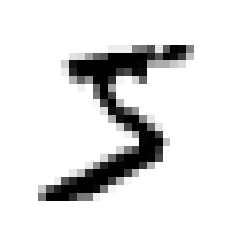

In [32]:
some_digit = X_train.iloc[0]
plot_digit(some_digit)

Here are the predictions from our two models:

In [33]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [34]:
rf_clf.predict([some_digit])

/home/alex/anaconda3/envs/dat801/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

Behind the scenes, scikit-learn trained 10 binary classifiers for us, and used them all on the `some_digit` data point. The class whose decision score was the highest was the ouput from `predict`:

In [35]:
sgd_clf.decision_function([some_digit])

array([[ -52074.00622961,  -90932.76755577,  -20253.71519718,
          13700.40693397, -153621.49226805,   -4632.87432725,
        -107360.91391427,  -90145.62086593,    -980.42911341,
         -44100.09135652]])

In [36]:
# Return the position of the element with the highest value in the array. 
# That is the model's prediction.

np.argmax(sgd_clf.decision_function([some_digit]))

3

We can do the same with random forest classifiers by asking for the list of probabilities that the random forest assigned to each class:

In [37]:
rf_clf.predict_proba([some_digit])

/home/alex/anaconda3/envs/dat801/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

...and notice that the sixth class (corresponding to 5s) got assigned the highest probability.

In [38]:
np.argmax(rf_clf.predict_proba([some_digit]))

/home/alex/anaconda3/envs/dat801/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


5

## Evaluation

We can then use the same evaluation techniques that we used in the previous notebook:

In [39]:
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [40]:
from sklearn.metrics import accuracy_score

### Cross-validation

We first compute predictions on all the training data using `cross_val_predict`:

In [41]:
# Warning: These computations take some time (depending on your CPU)...
sgd_train_pred = cross_val_predict(sgd_clf, X_train_std, y_train, n_jobs=-1)
rf_train_pred = cross_val_predict(rf_clf, X_train, y_train, n_jobs=-1)

Then we can compute the accuracy on the training data (NB: note that we used `cross_val_predict` which means that the predictions are on data unseen during model fitting/training).

In [42]:
accuracy_score(y_train, sgd_train_pred)

0.8955833333333333

In [43]:
accuracy_score(y_train, rf_train_pred)

0.96645

In [44]:
#cross_val_score(sgd_clf, X_train_std, y_train, cv=3, scoring="accuracy", n_jobs=-1)

#cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)

### Accuracy on the test set

Based on the above cross-validation performance, we may decide to work more on our model selection steps (feel free to try out whatever you can think of!). Once that's completely done we can evaluate the model on the test set to get our estimated generalization performance:

In [45]:
accuracy_score(y_test, sgd_clf.predict(X_test))

/home/alex/anaconda3/envs/dat801/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


0.8253

In [46]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.9705

### Confusion matrix


Let's compare the two classifiers' confusion matrices:

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
# If on colab, we need to download `utils.py` from the course repo before we can import the function
if colab:
    !wget https://raw.githubusercontent.com/alu042/DAT801/master/notebooks/utils.py

from utils import plot_confusion_matrix

In [49]:
sgd_cm = confusion_matrix(y_train, sgd_train_pred)
rf_cm = confusion_matrix(y_train, rf_train_pred)

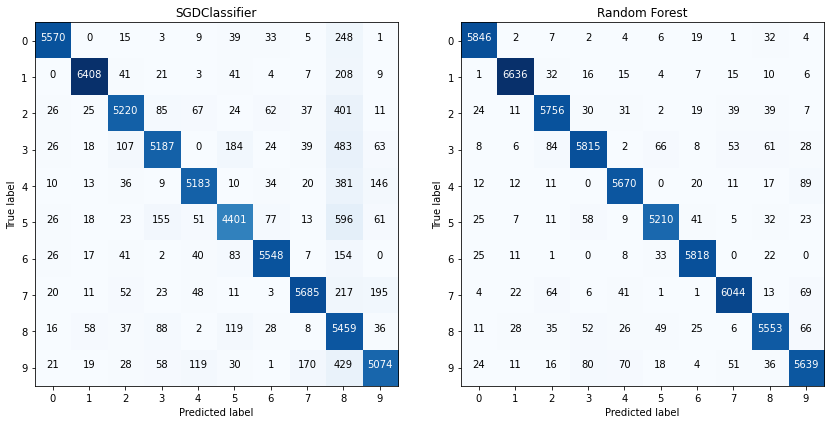

In [50]:
cms = [sgd_cm, rf_cm]
titles = ["SGDClassifier", "Random Forest"]
fig, axes = plt.subplots(1, 2, figsize=(12,6))

for i, ax in enumerate(axes.flat):
    plot_confusion_matrix(cms[i], classes=sgd_clf.classes_, ax=ax, title=titles[i])

Both confusion matrices look pretty good: most of the images land on the diagonal. However, there are errors and there seems to be some patterns in them... Let's take a closer look.

> As a side note: these are not the kinds of models you would use for computer vision problems these days. You've heard of **"deep learning"** and the **revolution** it has caused in machine learning during the last couple of years. Where it started, and where it's made the most impact until now, is in computer vision. Using deep learning it is _very_ easy to reach models that score more than 99.7% accuracy on MNIST. Which means that the model makes a mistake on *less than 30 images of the 10.000 test images*! And for some of these images, if we take a look ourself, we would agree with the machine's predictions. Modern deep learning has blown away MNIST as a benchmark by essentially "solving" it. 

Another side-note: **Accuracy, precision, recall in multiclass settings**

> In  a previous exercise I asked you to consider how to define precision and recall in a multiclass setting. Think about it again. See if you can figure out how the following numbers are computed: 

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_train, rf_train_pred, digits=3))

              precision    recall  f1-score   support

           0      0.978     0.987     0.982      5923
           1      0.984     0.984     0.984      6742
           2      0.957     0.966     0.961      5958
           3      0.960     0.948     0.954      6131
           4      0.965     0.971     0.968      5842
           5      0.967     0.961     0.964      5421
           6      0.976     0.983     0.979      5918
           7      0.971     0.965     0.968      6265
           8      0.955     0.949     0.952      5851
           9      0.951     0.948     0.949      5949

    accuracy                          0.966     60000
   macro avg      0.966     0.966     0.966     60000
weighted avg      0.966     0.966     0.966     60000



# Error analysis

We can zoom in on the errors in the confusion matrices by disregarding the main diagonal. First we have to scale each value by the number of images in the corresponding class, to properly compare error rates. Then we put zeros on the diagonal to better see the patterns elsewhere:

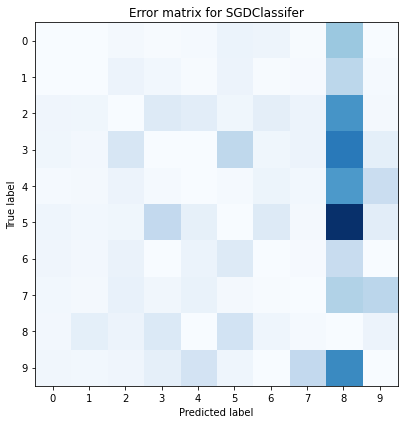

In [53]:
row_sums = sgd_cm.sum(axis=1, keepdims=True)
norm_sgd_cm = sgd_cm / row_sums
np.fill_diagonal(norm_sgd_cm, 0)

_ = plot_confusion_matrix(norm_sgd_cm, classes=sgd_clf.classes_, 
                         title="Error matrix for SGDClassifer", labels=False)

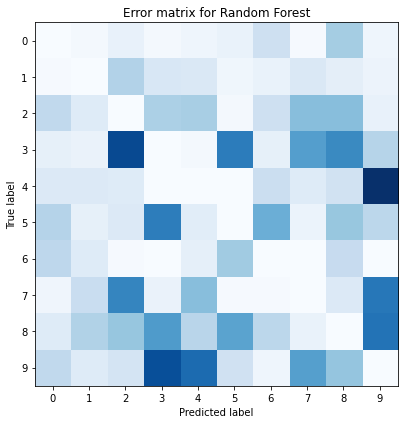

In [54]:
row_sums = rf_cm.sum(axis=1, keepdims=True)
norm_rf_cm = rf_cm / row_sums
np.fill_diagonal(norm_rf_cm, 0)

_ = plot_confusion_matrix(norm_rf_cm, classes=rf_clf.classes_, 
                         title="Error matrix for Random Forest", labels=False)

We notice several interesting things:
- For the SGDClassifier, the entire column 8 is dark --> many 8s get misclassified, most frequently as 5s.
- The patterns of errors in the SGDClassifier and the Random Forest classifier is quite different. This can lead us to prefer one over the other, depending on which class confusions we care most about. 

This gives us some ideas for improving our model. Perhaps we should try to improve the 8 and 9 classifications in the random forest, or work to fix the 8/5 confusion for the SGDClassifier.

## Analyzing individual errors

Let's plot some 3s and 5s. Some 3s that the model got correct, some it confused for 5s. Some 5s the confused for 3s, and some correct 5s. 

In [55]:
# Code taken from the book _Géron: Hands-On Machine Learning with Scikit-Learn and TensorFlow_
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances.values]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [56]:
def individual_errors(clf, cl_a, cl_b):
    cl_a, cl_b = str(cl_a), str(cl_b)
    X_aa = X_train[(y_train == cl_a) & (sgd_train_pred == cl_a)] # Correct class a's
    X_ab = X_train[(y_train == cl_a) & (sgd_train_pred == cl_b)] # a's predicted as b's
    X_ba = X_train[(y_train == cl_b) & (sgd_train_pred == cl_a)] # b's predicted as a's
    X_bb = X_train[(y_train == cl_b) & (sgd_train_pred == cl_b)] # Correct b's
    
    plt.figure(figsize=(10,10))
    plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
    plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
    plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
    plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

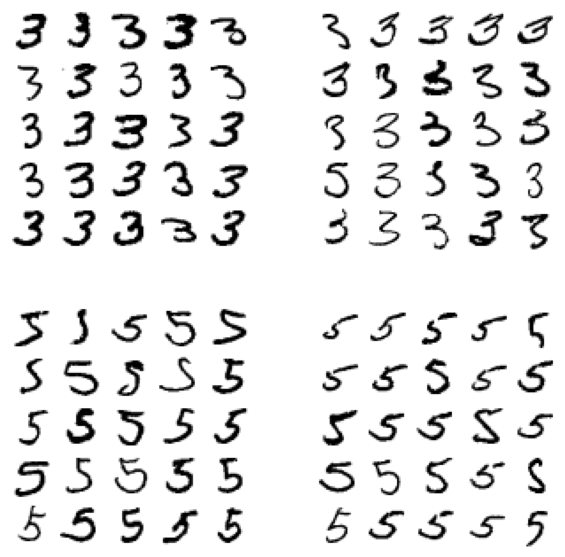

In [57]:
individual_errors(sgd_clf, 3, 5)

The SGDClassifier is a linear model. All it does is assign a weight per class to each pixel, and when it sees a new image it just sums up the wighted pixel intensities to get a score for each class. Since 3s and 5s only differ only by a few pixels, this model will easily confuse them. Same for 7s and 9s:

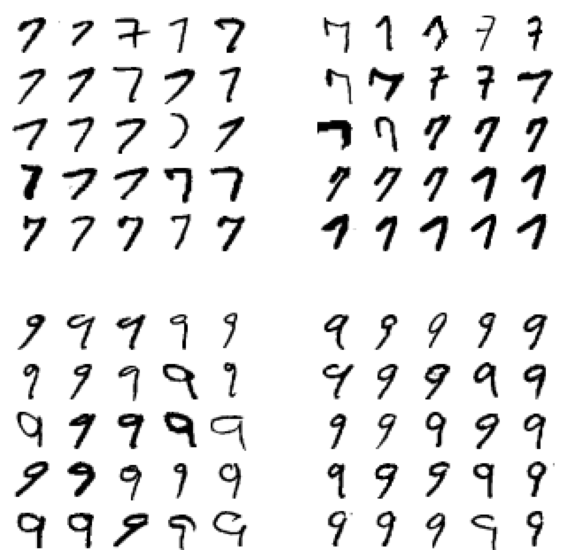

In [58]:
individual_errors(sgd_clf, 7, 9)

One would expect it to perform better on for example 1s and 4s:

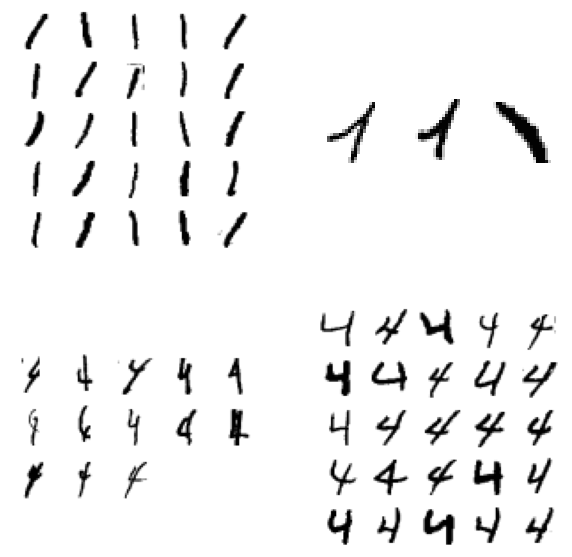

In [59]:
individual_errors(sgd_clf, 1, 4)

> **Your turn!** Do a similar error analysis for the Random Forest classifier.

# End

Now you've learned about some of the main practical machine learning ideas and techniques, and you're actually already equipped to go out and attack real-world classification problems.

However, we've treated the models as black boxes. **We haven't really discussed how machine learning models work!** It's important to know some of the how's to be an effective machine learning practitioner.

Later, we'll dig deep into one of the most popular models: the Random Forest.